<P> <B> <font color=yellow size="6"> ElasticNet Regression </Font></B> </P>

ElasticNet Regression is a linear regression model that combines L1 (Lasso) and L2 (Ridge) regularization. It is particularly useful when you have multicollinear features or when you want to balance between feature selection (L1 regularization) and coefficient shrinkage (L2 regularization).

<b>When to Use ElasticNet Regression:</b>

  <ol><li> Multicollinear Features: When features are highly correlated, ElasticNet handles it better than Lasso by including L2 regularization.</li>

   <li>  High-Dimensional Data: When you have more features than samples, ElasticNet can select the most relevant features while controlling overfitting.</li>

   <li>  Feature Selection: ElasticNet can perform feature selection via the L1 penalty while still regularizing the model with L2.</li>

 <li>    Need for Balance: If Lasso (L1) over-penalizes some features and Ridge (L2) doesn’t shrink enough, ElasticNet provides a balanced approach.</li>

<b>Key Points:</b>
<ol>
    <li>ElasticNet is a compromise between Lasso and Ridge regression.</li>
   <li>The alpha and l1_ratio parameters require tuning, often done through cross-validation (e.g., using GridSearchCV).</li>
    <li>It is well-suited for datasets with correlated or high-dimensional features.</li></ol>

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)

In [4]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)


In [6]:
# Standardize the features (important for regularization-based methods)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<b>ElasticNet Parameters:</b>
<ol>
    <li>alpha=1.0: Controls the overall strength of regularization. Larger values of alpha apply more regularization. </li>
     <li>l1_ratio=0.5: Balances the mix of L1 and L2 regularization: </li>
     <li>l1_ratio=1 means pure Lasso (L1). </li>
    <li> l1_ratio=0 means pure Ridge (L2). </li>
     <li>Values between 0 and 1 mix the two regularizations. </li></ol>

In [7]:
# Initialize the ElasticNet model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Default alpha and l1_ratio

In [8]:
# Fit the model
elastic_net.fit(X_train, y_train)

ElasticNet(random_state=42)

In [9]:
# Make predictions
y_pred_train = elastic_net.predict(X_train)
y_pred_test = elastic_net.predict(X_test)

In [10]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [11]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")

Training Mean Squared Error: 0.4420
Testing Mean Squared Error: 0.4393
Training R^2 Score: 0.2177
Testing R^2 Score: 0.1901


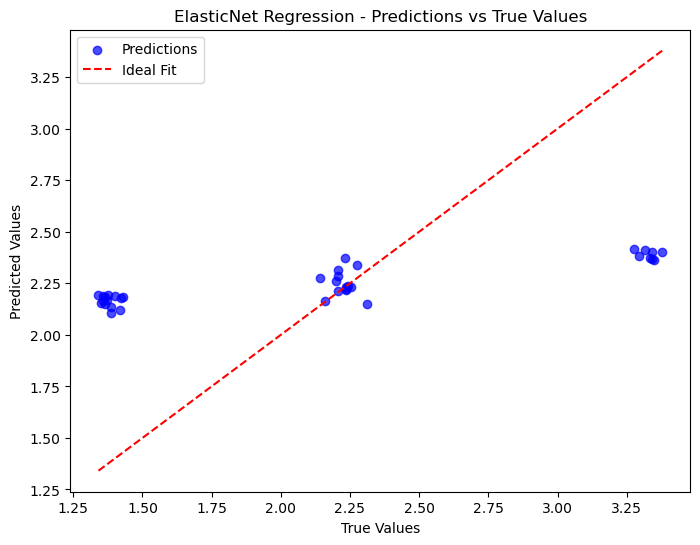

In [12]:
# Visualize predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('ElasticNet Regression - Predictions vs True Values')
plt.legend()
plt.show()